### Long Call Sensitivity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pricing import BlackScholesMerton
from configuration import OptionConfigurationBuilder

In [2]:
configuration = OptionConfigurationBuilder(
    kind='call',
    strike=100,
    dividend_yield=0,
    risk_free_rate=0
)

In [3]:
price = pd.DataFrame()
delta, gamma, vega, theta, rho = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame() 

for maturity, sigma in ((252, 0.2), (252, 0.1), (126, 0.2)):
    for spot in range(10, 190):
        
        # Configuration --------------------------------------
        
        configuration.maturity = maturity
        configuration.sigma = sigma
        configuration.spot = spot

        # Option  --------------------------------------------

        call = BlackScholesMerton(configuration)

        # Retrieve Result ------------------------------------
        
        price.loc[spot, f"maturity {maturity} sigma {sigma}"] = call.price()
        delta.loc[spot, f"maturity {maturity} sigma {sigma}"] = call.delta()
        gamma.loc[spot, f"maturity {maturity} sigma {sigma}"] = call.gamma()
        vega.loc[spot, f"maturity {maturity} sigma {sigma}"] = call.vega()
        theta.loc[spot, f"maturity {maturity} sigma {sigma}"] = call.theta()
        rho.loc[spot, f"maturity {maturity} sigma {sigma}"] = call.rho()

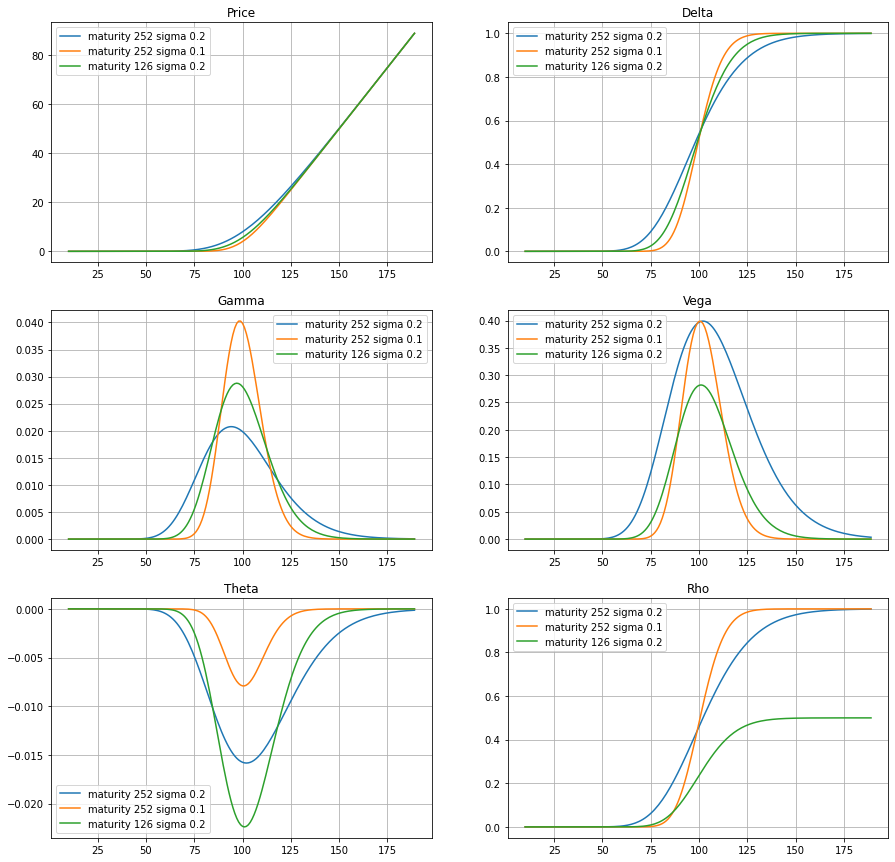

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=2)
price.plot(ax=axes[0, 0], title='Price', grid=True, legend=True)
delta.plot(ax=axes[0, 1], title='Delta', grid=True, legend=True)
gamma.plot(ax=axes[1, 0], title='Gamma', grid=True, legend=True)
vega.plot(ax=axes[1, 1], title='Vega', grid=True, legend=True)
theta.plot(ax=axes[2, 0], title='Theta', grid=True, legend=True)
rho.plot(ax=axes[2, 1], title='Rho', grid=True, legend=True)
fig.set_figheight(15)
fig.set_figwidth(15);